<a href="https://colab.research.google.com/github/luisChambilla20/ss/blob/main/Regresi%C3%B3n_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Te damos la bienvenida la segunda parte de este ejercicio de regresión.

---



## Este ejercicio continuará donde terminó el anterior, para esto es necesario

El primer paso es conseguir un dataset o conjunto de datos, para esto podemos recurrir al sitio Kaggle.com, el cual entre otras cosas ofrece datasets abiertos.

En este caso usaremos el dataset kc_house_data (https://www.kaggle.com/shivachandel/kc-house-data) ,el cual contiene datos de distintas casas en Washington, EEUU.

Puedes descargar el conjunto de datos desde este enlace:
https://drive.google.com/file/d/1sIwmhhn50utRZY556ENMAa13sIxWSzHj/view?usp=sharing

Una vez lo tengas descargado es importante que sepas donde lo dejaste guardado.

Esta segunda parte del ejercicio contiene todo lo de la primera, una vez llegues a una celda que dice "Comienza la segunda parte" es donde está todo lo nuevo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#¿Como ejecutar el código?

Toda celda de código en Google Colab tiene un botón de ejecutar arriba a la izquierda, cada vez que lo clickees se ejecutará todo el cógido de la celda.

In [5]:
file_path = 'car.csv'

df = pd.read_csv(file_path)

Antes de hacer cualquier otra cosa es importante examinar y entender el dataset, por eso se utilizaran algunas funciones de ejemplo. Como describe, head, shape y dtypes



In [6]:
df.describe() # la funcion describe nos muestra un buen resumen del dataset

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
df.head() # la funcion head nos muestra los primeros 5 elementos del dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df.shape # la funcion shape nos da la forma del dataset en este formato (Cantidad de filas, cantidad de columnas)

#Las cantidad de filas representa la cantidad de casas del dataset
#La cantidad de columnas representa la cantidad de atributos o datos que tiene cada casa del dataset

(19237, 18)

In [9]:
df.dtypes # la funcion dtypes nos muestra los tipos de variables del dataset, podemos ver que la mayoria son numeros enteros

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [11]:
correlations = df.corr()['Price']

# la funcion corr nos permite obtener las correlaciones entre las distintas variables
# En este caso selecionamos del dataframe la variable "price" (precio), por lo cual
# obtendremos las relaciones entre esta variable y las demas
# Entre mas cercano a 1 sea el valor mayor es la correlacion y mejor es la variable para predecir "price"

print(correlations) # imprimimos los valores

#sqft_living (pies cuadrados de la vivienda) deberia dar el valor de mayor correlacion con el precio de la casa


ID           -0.000844
Price         1.000000
Prod. year    0.012982
Cylinders     0.007518
Airbags      -0.012824
Name: Price, dtype: float64


<ipython-input-11-f889b993225d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Price']


Al igual que con el R2, entre más cercano a 1 sea el valor de correlación mejor.

Al usar la función shape la consola debería haber mostrado que el dataset contiene 21613, lo cual puede ser una cantidad incomoda para visualizar en gráficas como haremos más adelante. Por este motivo en el siguiente bloque de codigo vamos a "achicar el dataset", dejando solo 15 casas para analizar. Más adelante usaremos todo el dataset y podremos comparar resultados.

In [15]:
df_min = df.sample(15, random_state=10) #creamos un nuevo dataset al cual copiamos 15 valores del dataset original
# random_state=10 es un valor que deberias mantener igual si quieres obtener las mismas graficas, es basicamente la forma de asegurarse de que los 15 datos que seleccionamos sean los mismos
# si pongo otro valor como random state el conjunto de 15 datos seria diferente

from sklearn.linear_model import LinearRegression # Sklearn es la libreria de machine leaarning que estaremos usando, por ahora solo usaremos su funcion de Regresion lineal
X = df_min['Prod. year'].values.reshape(-1, 1)
y = df_min['Price'].values.reshape(-1, 1)


Text(0.5, 0, 'Año de produccion')

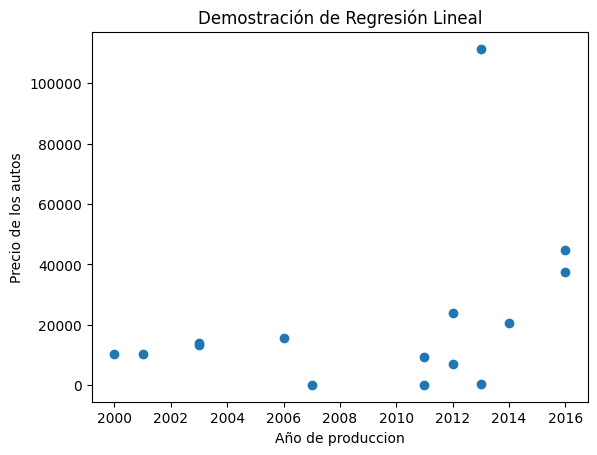

In [17]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar


# Ahora que tenemos un conjunto de datos mas pequeño deberia ser facil graficarlo

plt.scatter(X,y) # Genera una grafica de puntos

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Precio de los autos') # defino un nombre del eje y
plt.xlabel('Año de produccion') # defino un nombre del eje x

In [18]:
reg = LinearRegression().fit(X,y)
# La funcion fit relaciona los valores de X e y, mientras que Linear Regression calcula la recta
# la recta (y = mx + b) obtenida se guarda en la variable reg

Matematicamente, los valores obtenidos a través de la recta se representan matemáticamente así: *ŷ*, para diferenciarlo de la *y* común, la cual en este caso contiene los valores de precios. Como a *ŷ* se le suele decir "y con sombrero" (en inglés "hat" es "sombrero") llamaremos a la variable que contiene los valores predecidos y_hat, lo cual seria como llamarla y_con_sombrero

In [19]:
y_hat = reg.predict(X) # Sustituimos en la recta (y = mx + b) nuestros valores iniciales de X
print(y_hat) # guardamos los resultados en y_hat

[[30534.97660819]
 [24761.8245614 ]
 [24761.8245614 ]
 [ 9366.75243665]
 [ 3593.60038986]
 [ 5517.98440546]
 [34383.74463938]
 [26686.208577  ]
 [15139.90448343]
 [ 9366.75243665]
 [17064.28849903]
 [26686.208577  ]
 [28610.59259259]
 [34383.74463938]
 [28610.59259259]]


Text(0.5, 0, 'Superficie en pies cuadrados')

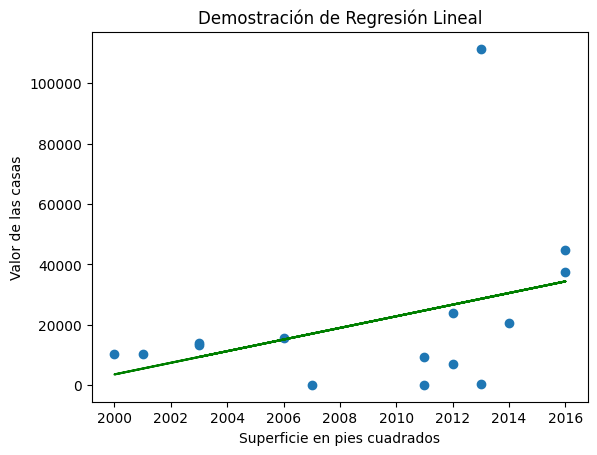

In [20]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y)
plt.plot(X, y_hat, color='green')

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Precio de los autos') # defino un nombre del eje y
plt.xlabel('Año de produccion') # defino un nombre del eje x

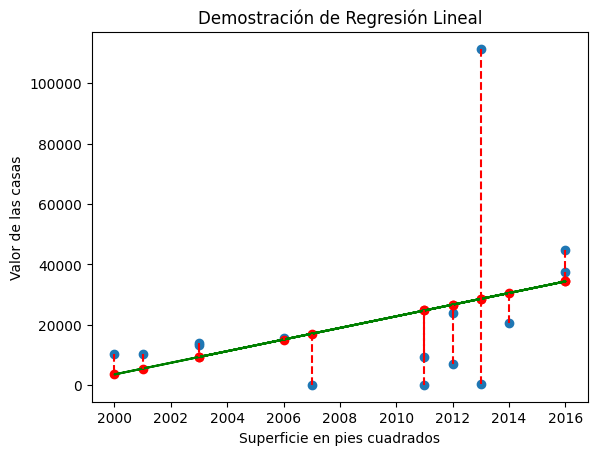

In [21]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y) # Grafica de dispersion, muestra los puntos iniciales

plt.scatter(X,y_hat, color='red')

# grafica de dispersion, muestra los puntos que se obtienen al sustituir nuestros valores iniciales de X en la ecuacion y = mx + b obtenida mediante regresion

plt.plot(X, y_hat, color='green') # Dibuja la linea de regresion


plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Precio de los autos') # defino un nombre del eje y
plt.xlabel('Año de produccion') # defino un nombre del eje x

# No preocuparse demasiado por esta parte, al igual que las otras graficas no es necesaria
# pero ayuda a visualizar que esta pasando

# Esto es un loop, el cual recorre todos los valores de los conjuntos X, y, y_hat
# a medida que los recorre va dibujando lineas punteadas para ilustrar el error de la regresion
for i in range(0, len(X)):
  point1 = [X[i], y[i]]
  point2 = [X[i], y_hat[i]]

  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]

  plt.plot(x_values, y_values, color='red', linestyle='dashed')



En este momento en la variable y tenemos los valores de precios originales, mientras que en y_hat tenemos los valores de precios obtenidos mediante la regresión lineal. Si comparamos la diferencia entre estos valores podemos obtener el R2 de la recta.


In [22]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.13823732520312504

Text(0.5, 0, 'Año de produccion')

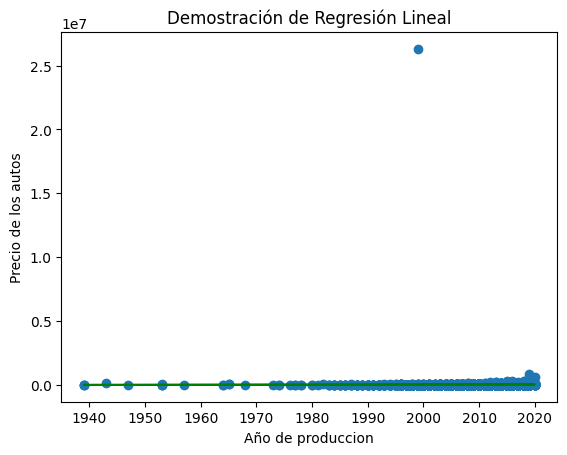

In [26]:
# Defino nuevos valores de X e y pero con un 1 al final para no repetir nombres de variables

X1 = df['Prod. year'].values.reshape(-1, 1)
y1 = df['Price']

# vuelvo a usar las herramientas de regresion

reg = LinearRegression().fit(X1,y1)
y_hat1 = reg.predict(X1)

# Y grafico nuevamente
plt.scatter(X1,y1)
plt.plot(X1, y_hat1, color='green')
plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Precio de los autos') # defino un nombre del eje y
plt.xlabel('Año de produccion') # defino un nombre del eje x

Ahora que tengo todos los datos la recta ya no parece tan representativa, ¿No?

Veamos su valor de R2

In [27]:
r2_score(y1, y_hat1)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.00016854369360608246